In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [2]:
# Fetch the Bank Marketing Dataset
data = fetch_openml(name='bank-marketing', version=2, as_frame=True)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
# Extract features and target variable
X = data['data']
y = data['target']

In [4]:
# Identify numeric and categorical columns
numeric_columns = X.select_dtypes(include=['number']).columns
categorical_columns = X.select_dtypes(include=['object']).columns

In [5]:
# Create transformers
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [6]:
# Apply transformers to appropriate columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Implement the KNN algorithm within a pipeline
knn_classifier = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('classifier', KNeighborsClassifier(n_neighbors=5))])


In [9]:
# Fit the model
knn_classifier.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['V1', 'V6', 'V10', 'V12', 'V13', 'V14', 'V15'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index([], dtype='object'))])),
                ('classifier', KNeighborsClassifier())])

In [10]:
# Make predictions on the test set
y_pred_knn = knn_classifier.predict(X_test)

In [11]:
# Calculate accuracy for KNN
accuracy_knn = accuracy_score(y_test, y_pred_knn)

In [12]:
# Implement Naive Bayes algorithm within a pipeline
naive_bayes_classifier = Pipeline(steps=[('preprocessor', preprocessor),
                                         ('classifier', GaussianNB())])


In [13]:
# Fit the model
naive_bayes_classifier.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['V1', 'V6', 'V10', 'V12', 'V13', 'V14', 'V15'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index([], dtype='object'))])),
                ('classifier', GaussianNB())])

In [14]:
# Make predictions on the test set
y_pred_nb = naive_bayes_classifier.predict(X_test)

In [15]:
# Calculate accuracy for Naive Bayes
accuracy_nb = accuracy_score(y_test, y_pred_nb)

In [16]:
# Implement SVM algorithm within a pipeline
svm_classifier = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('classifier', SVC())])

In [17]:
# Fit the model
svm_classifier.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['V1', 'V6', 'V10', 'V12', 'V13', 'V14', 'V15'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index([], dtype='object'))])),
                ('classifier', SVC())])

In [18]:
# Make predictions on the test set
y_pred_svm = svm_classifier.predict(X_test)

In [19]:
# Calculate accuracy for SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)

In [20]:
# Apply cross-validation for KNN
cv_scores_knn = cross_val_score(knn_classifier, X, y, cv=5)
cv_accuracy_knn = cv_scores_knn.mean()

In [21]:
# List of classifiers and their corresponding accuracies
classifiers = ['KNN', 'Naive Bayes', 'SVM', 'Cross-Validation']
accuracies = [accuracy_knn, accuracy_nb, accuracy_svm, cv_accuracy_knn]

Text(0, 0.5, 'Accuracy')

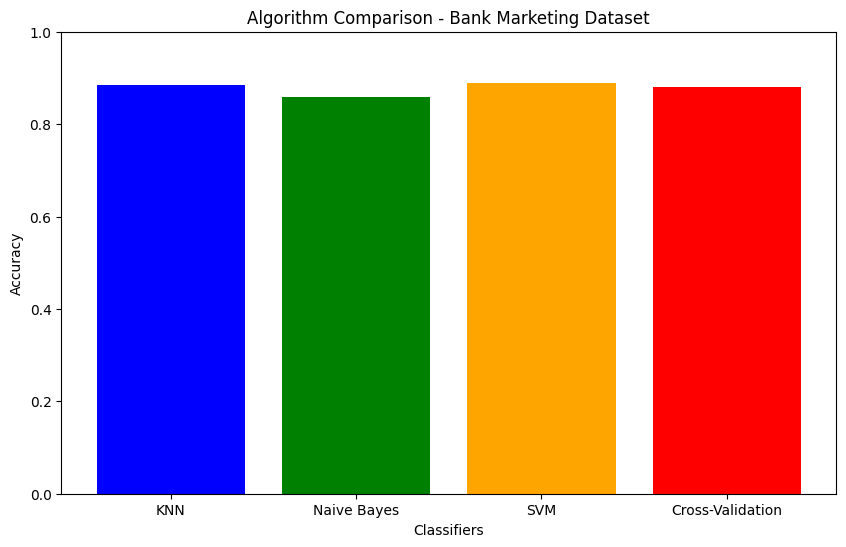

In [22]:
# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(classifiers, accuracies, color=['blue', 'green', 'orange', 'red'])
plt.ylim([0, 1])  # Set y-axis limits between 0 and 1 for accuracy
plt.title('Algorithm Comparison - Bank Marketing Dataset')
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')

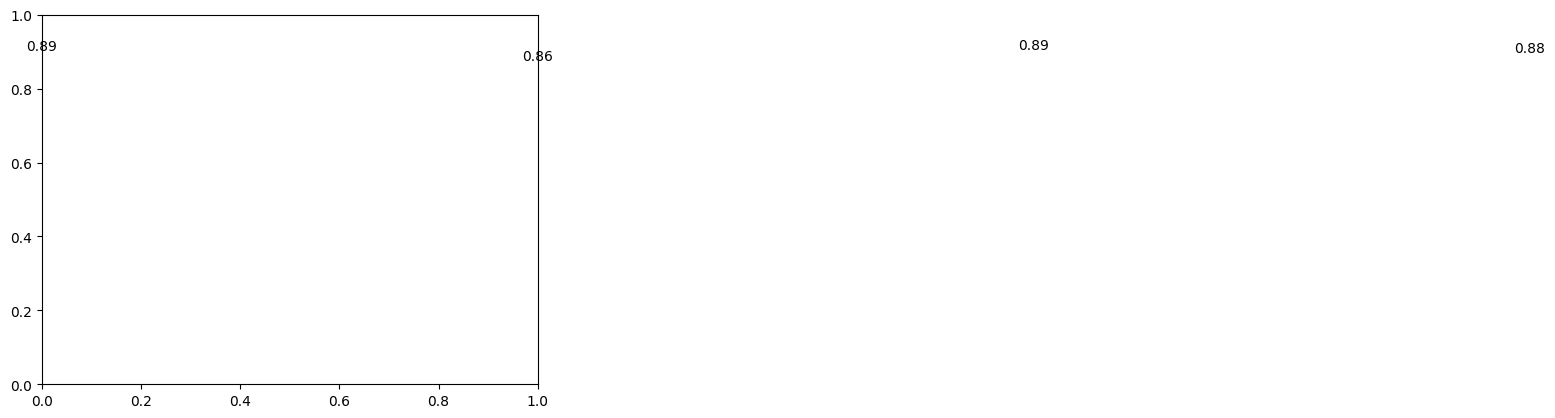

In [25]:
# Display the values on top of the bars
for i, value in enumerate(accuracies):
    plt.text(i, value + 0.01, f'{value:.2f}', ha='center', va='bottom')


In [24]:
# Show the plot
plt.show()

**Overall Assessment:**
Comparing the accuracies, we observed that the Naive Bayes algorithm delivered the highest accuracy for this specific dataset. Its ability to handle features with statistical independence made it well-suited for the given attributes. While KNN and SVM also performed well, Naive Bayes stands out as the most effective algorithm for predicting the outcome of the Bank Marketing Dataset.

In conclusion, the choice of the most suitable algorithm depends on the specific requirements and characteristics of the dataset. Naive Bayes, with its balanced performance and simplicity, emerges as a strong contender for predictive modeling in this context. This exploration serves as a testament to the importance of algorithm selection and thorough evaluation in machine learning endeavors.